In [2]:
from matplotlib import pyplot as plt
import pandas as pd

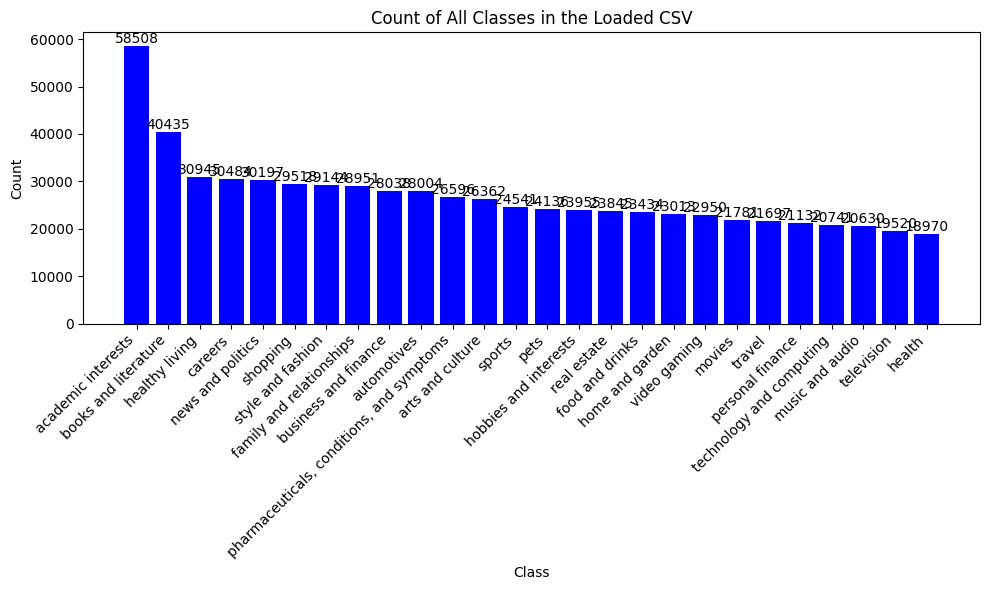

In [2]:
 # Change this to your CSV file path
df = pd.read_csv('dataset/train.csv', encoding='ISO-8859-1')

# Step 2: Count unique values in the DataFrame
count = df['target'].value_counts().reset_index()
count.columns = ['target', 'Count']

# Step 3: Plot the counts for all classes
plt.figure(figsize=(10, 6))

# Bar plot for counts
plt.bar(count['target'], count['Count'], color='blue')

# Adding labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of All Classes in the Loaded CSV')

# Annotate counts on the plot
for i in range(len(count)):
    plt.annotate(f'{count["Count"].iloc[i]}', 
                 xy=(count['target'].iloc[i], count['Count'].iloc[i] + 0.5),
                 ha='center', va='bottom', color='black')

# Add x-ticks
plt.xticks(ticks=range(len(count)), labels=count['target'], rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


In [6]:
import pandas as pd

# Load the CSV file (adjust the file path and encoding as needed)
df = pd.read_csv('dataset/train.csv', encoding='ISO-8859-1')

# Check for duplicate rows based on 'text' and 'target' columns
# 'keep' is set to 'first' to retain the first occurrence of a duplicate and remove the rest
duplicates = df.duplicated(subset=['text', 'target'], keep='first')

# Remove the duplicate rows
df_cleaned = df[~duplicates]

# Save the cleaned DataFrame to a new CSV file
df_cleaned.to_csv('dataset/cleaned_data.csv', index=False)

print(f"Duplicates removed based on 'text' and 'target'. Cleaned data saved to 'cleaned_data.csv'.")


Duplicates removed based on 'text' and 'target'. Cleaned data saved to 'cleaned_data.csv'.


In [7]:
# View the duplicates before removing them
duplicate_rows = df[duplicates]
print(duplicate_rows)

                                                     text  \
7533    BHUBANESWAR: OJEE, which is conducting the med...   
8443    BENGALURU: Prime Minister Narendra Modi will i...   
8483    AHMEDABAD: With a steady drop in COVID-19 case...   
8576    CHENNAI: Enrollment in University of Madras's ...   
14313   AMARAVATI: Andhra Pradesh Chief Minister Y.S. ...   
...                                                   ...   
612092  first major weapons reduction by the rivals.Bo...   
613355  be lucky in getting promotion in the current j...   
613356  be tested. With the help of patience, you migh...   
613357  go for outing with the family, which will boos...   
614343  You feel no starry airs when in conversation w...   

                          target  Word Count  
7533          academic interests         144  
8443          academic interests         146  
8483          academic interests         289  
8576          academic interests         291  
14313         academic interests

In [4]:
df = pd.read_csv('dataset/cleaned_data.csv', encoding='ISO-8859-1')
# Step 2: Define the specific class you're interested in
specific_class = 'academic interests'  # Change this to your specific class

# Step 3: Filter the dataset for the specific class
class_df = df[df['target'] == specific_class].copy()

# Step 4: Calculate word count for each row in the 'text' column for the specific class
class_df['word_count'] = class_df['text'].apply(lambda x: len(x.split()))

# Step 5: Calculate the thresholds for top and bottom 5% for the specific class
lower_threshold = class_df['word_count'].quantile(0.15)  # Bottom 5%
upper_threshold = class_df['word_count'].quantile(0.95)  # Top 5%

# Step 6: Filter out the rows with word counts in the top and bottom 5%
filtered_class_df = class_df[(class_df['word_count'] > lower_threshold) & (class_df['word_count'] < upper_threshold)]

# Step 7: Prepare to save the filtered class with all other classes unchanged
# Filter the rest of the classes
other_classes_df = df[df['target'] != specific_class]

# Step 8: Combine the filtered specific class DataFrame with the rest of the classes
final_df = pd.concat([filtered_class_df, other_classes_df], ignore_index=True)

# Step 9: Save the resulting DataFrame to a new CSV file
final_df.to_csv('dataset/filtered.csv', index=False)

print("Filtered dataset saved as 'filtered.csv'.")

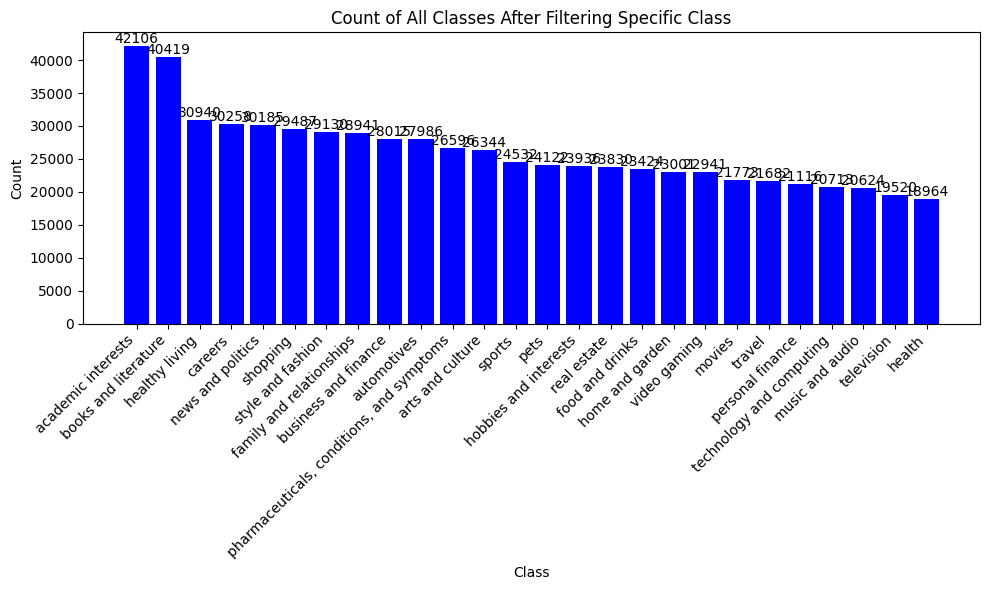

In [5]:
import pandas as pd
from matplotlib import pyplot as plt
# Load the filtered dataset
filtered_csv_file_path = 'dataset/filtered.csv'  # Change this to your CSV file path
df = pd.read_csv(filtered_csv_file_path, encoding='ISO-8859-1')

# Count unique values in the DataFrame
count = df['target'].value_counts().reset_index()
count.columns = ['target', 'Count']

# Plot the counts for all classes
plt.figure(figsize=(10, 6))

# Bar plot for counts
plt.bar(count['target'], count['Count'], color='blue')

# Adding labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of All Classes After Filtering Specific Class')

# Annotate counts on the plot
for i in range(len(count)):
    plt.annotate(f'{count["Count"].iloc[i]}', 
                 xy=(count['target'].iloc[i], count['Count'].iloc[i] + 0.5),
                 ha='center', va='bottom', color='black')

# Add x-ticks
plt.xticks(ticks=range(len(count)), labels=count['target'], rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


In [2]:
import pandas as pd
import random
import nltk
from nltk.corpus import wordnet
from sklearn.model_selection import train_test_split

# Load your dataset
data = pd.read_csv('dataset/filtered.csv', encoding='ISO-8859-1')
print(data.head())  # Check the data structure
print(data.columns)  # Verify column names

X = data['text']  # Feature column
y = data['target']  # Target column

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to replace words with synonyms
def synonym_replacement(text):
    words = nltk.word_tokenize(text)
    new_words = words.copy()
    for i, word in enumerate(words):
        synonyms = wordnet.synsets(word)
        if synonyms:
            synonym_words = [syn.lemmas()[0].name() for syn in synonyms if syn.lemmas() and syn.lemmas()[0].name() != word]
            if synonym_words:
                new_words[i] = random.choice(synonym_words)
    return ' '.join(new_words)

# Determine the median count among classes
median_count = int(y.value_counts().median())
print(f"Median class count: {median_count}")

# Oversample classes that are under the median count
def oversample_under_median(X, y, median_count):
    new_samples = []
    new_labels = []
    
    for target_class in y.unique():
        class_samples = X[y == target_class]
        current_count = len(class_samples)
        print(f"Current count for '{target_class}': {current_count}")
        
        if current_count < median_count:
            for _ in range(median_count - current_count):
                sample = random.choice(class_samples.tolist())
                new_sample = synonym_replacement(sample)
                new_samples.append(new_sample)
                new_labels.append(target_class)

    return new_samples, new_labels

# Undersample classes that are above the median count
def undersample_above_median(X, y, median_count):
    undersampled_X = []
    undersampled_y = []
    
    for target_class in y.unique():
        class_samples = X[y == target_class]
        current_count = len(class_samples)
        print(f"Current count for '{target_class}': {current_count}")
        
        if current_count > median_count:
            class_samples = random.sample(class_samples.tolist(), median_count)
        undersampled_X.extend(class_samples)
        undersampled_y.extend([target_class] * len(class_samples))

    return pd.Series(undersampled_X), pd.Series(undersampled_y)

# Create new samples for classes under the median count
new_texts, new_labels = oversample_under_median(X_train, y_train, median_count)

# Create undersampled dataset for classes above the median count
undersampled_X, undersampled_y = undersample_above_median(X_train, y_train, median_count)

# Combine original, new, and undersampled samples
oversampled_data = pd.DataFrame({
    'text': list(undersampled_X) + new_texts,
    'target': list(undersampled_y) + new_labels
})

# Add word count column
oversampled_data['wordcount'] = oversampled_data['text'].apply(lambda x: len(x.split()))

# Save to CSV
oversampled_data.to_csv('dataset/oversampled_data.csv', index=False)

# Check the class distribution in the oversampled dataset
print(oversampled_data['target'].value_counts())


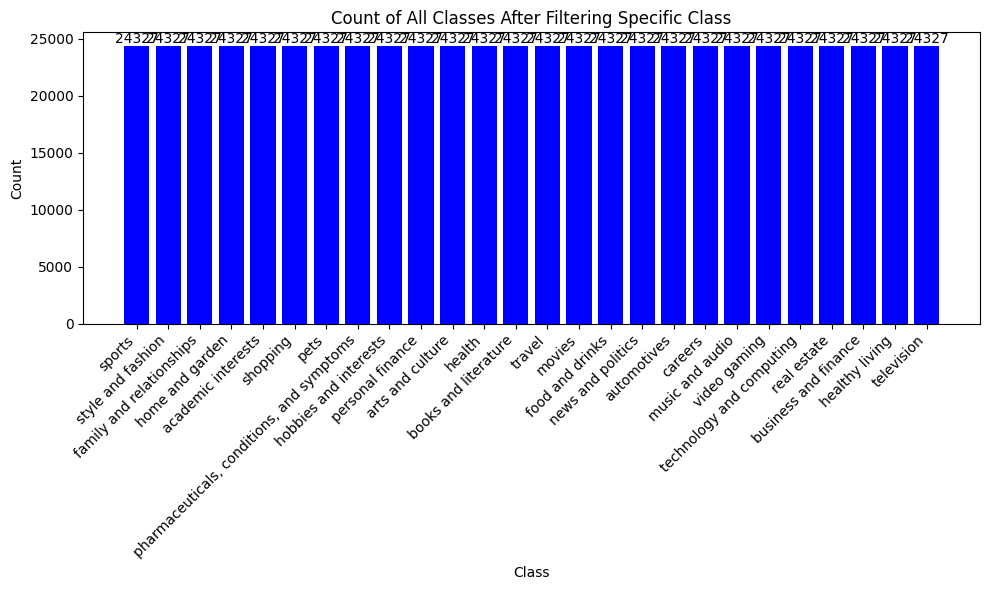

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
# Load the filtered dataset
filtered_csv_file_path = 'dataset/removed.csv'  # Change this to your CSV file path
df = pd.read_csv(filtered_csv_file_path, encoding='ISO-8859-1')

# Count unique values in the DataFrame
count = df['target'].value_counts().reset_index()
count.columns = ['target', 'Count']

# Plot the counts for all classes
plt.figure(figsize=(10, 6))

# Bar plot for counts
plt.bar(count['target'], count['Count'], color='blue')

# Adding labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of All Classes After Filtering Specific Class')

# Annotate counts on the plot
for i in range(len(count)):
    plt.annotate(f'{count["Count"].iloc[i]}', 
                 xy=(count['target'].iloc[i], count['Count'].iloc[i] + 0.5),
                 ha='center', va='bottom', color='black')

# Add x-ticks
plt.xticks(ticks=range(len(count)), labels=count['target'], rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()
df.info()
